In [1]:
from clustergrammer2 import net
import pandas as pd
from copy import deepcopy

>> clustergrammer2 backend version 0.6.0


In [2]:
df_ini = pd.read_csv('../data/primary_data/GSE147507_RawReadCounts_Human.tsv', sep='\t', index_col=0)
df_ini.head()

,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3,Series2_A549_Mock_1,Series2_A549_Mock_2,Series2_A549_Mock_3,Series2_A549_SARS-CoV-2_1,...,Series9_NHBE_IFNB_4h_1,Series9_NHBE_IFNB_4h_2,Series9_NHBE_IFNB_6h_1,Series9_NHBE_IFNB_6h_2,Series9_NHBE_IFNB_12h_1,Series9_NHBE_IFNB_12h_2,Series15_HealthyLungBiopsy_2,Series15_HealthyLungBiopsy_1,Series15_COVID19Lung_2,Series15_COVID19Lung_1
DDX11L1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WASH7P,29,24,23,34,19,44,68,43,33,65,...,72,66,46,35,48,46,261,140,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM138F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
new_cols = [(x, 'Cell Type: ' + x.split('_')[1], 'Treatment: ' + x.split('_')[2])  for x in df_ini.columns.tolist()]

In [4]:
df_ini.columns.tolist()

['Series1_NHBE_Mock_1',
 'Series1_NHBE_Mock_2',
 'Series1_NHBE_Mock_3',
 'Series1_NHBE_SARS-CoV-2_1',
 'Series1_NHBE_SARS-CoV-2_2',
 'Series1_NHBE_SARS-CoV-2_3',
 'Series2_A549_Mock_1',
 'Series2_A549_Mock_2',
 'Series2_A549_Mock_3',
 'Series2_A549_SARS-CoV-2_1',
 'Series2_A549_SARS-CoV-2_2',
 'Series2_A549_SARS-CoV-2_3',
 'Series3_A549_Mock_1',
 'Series3_A549_Mock_2',
 'Series3_A549_RSV_1',
 'Series3_A549_RSV_2',
 'Series4_A549_Mock_1',
 'Series4_A549_Mock_2',
 'Series4_A549_IAV_1',
 'Series4_A549_IAV_2',
 'Series5_A549_Mock_1',
 'Series5_A549_Mock_2',
 'Series5_A549_Mock_3',
 'Series5_A549_SARS-CoV-2_1',
 'Series5_A549_SARS-CoV-2_2',
 'Series5_A549_SARS-CoV-2_3',
 'Series6_A549-ACE2_Mock_1',
 'Series6_A549-ACE2_Mock_2',
 'Series6_A549-ACE2_Mock_3',
 'Series6_A549-ACE2_SARS-CoV-2_1',
 'Series6_A549-ACE2_SARS-CoV-2_2',
 'Series6_A549-ACE2_SARS-CoV-2_3',
 'Series7_Calu3_Mock_1',
 'Series7_Calu3_Mock_2',
 'Series7_Calu3_Mock_3',
 'Series7_Calu3_SARS-CoV-2_1',
 'Series7_Calu3_SARS-CoV-2_2

In [7]:
df_cat = deepcopy(df_ini)
df_cat.columns = new_cols

In [8]:
df_cat.shape

(21797, 69)

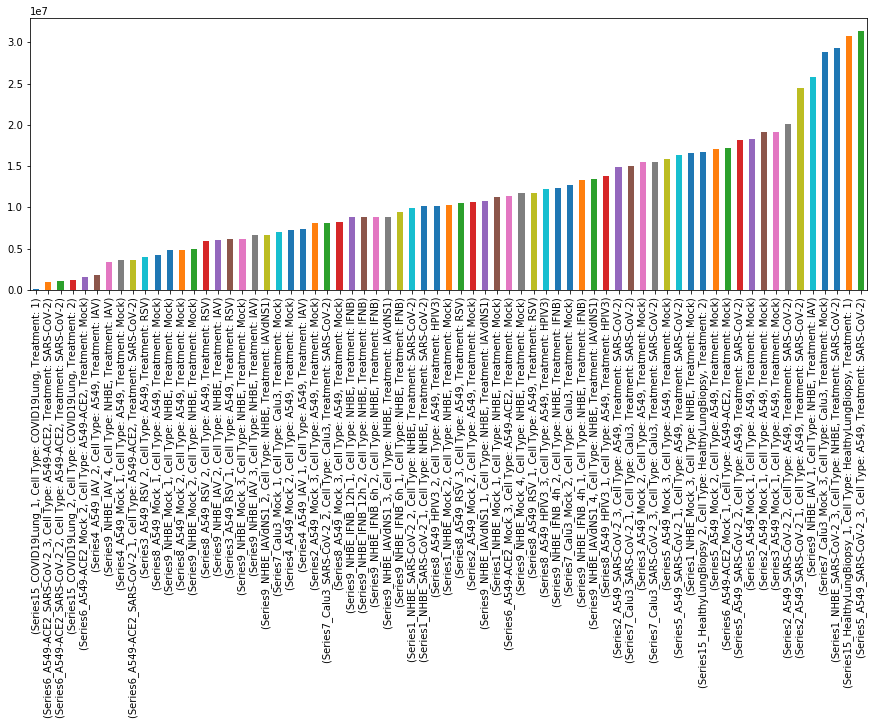

In [9]:
df_cat.sum(axis=0).sort_values().plot(kind='bar', figsize=(15,5))

In [10]:
df_cat_umi = net.umi_norm(df_cat)

In [13]:
df_cat.to_csv('../data/gex_cat.tsv', sep='\t')

In [14]:
cats = [x[1] for x in df_cat.columns.tolist()]
pd.Series(cats).value_counts()

Cell Type: A549                 29
Cell Type: NHBE                 24
Cell Type: Calu3                 6
Cell Type: A549-ACE2             6
Cell Type: COVID19Lung           2
Cell Type: HealthyLungBiopsy     2
dtype: int64

In [11]:
net.load_df(df_cat_umi)
net.filter_N_top(inst_rc='row', rank_type='var', N_top=1000)
net.normalize(axis='row', norm_type='zscore')
net.widget()

ExampleWidget(network='{"row_nodes": [{"name": "ACE2", "ini": 1000, "clust": 13, "rank": 471, "rankvar": 44, "…